In [3]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import warnings


In [4]:
df = pd.read_csv('data/airline_prices.csv')

In [5]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [6]:
df = df.drop(columns=['flight'],axis=1)

In [7]:
df = df.drop(columns=['duration'],axis=1)

In [8]:
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,1,5955


In [9]:
X = df.drop(columns=['price'],axis=1)

In [10]:
X.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,days_left
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,1
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,1
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,1
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,1
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,1


In [11]:
print("Categories in 'airline' variable:  ",end=" " )
print(df['airline'].unique())

print("Categories in 'source_city' variable:  ",end=" " )
print(df['source_city'].unique())

print("Categories in 'departure_time' variable:  ",end=" " )
print(df['departure_time'].unique())

print("Categories in 'stops' variable:  ",end=" " )
print(df['stops'].unique())

print("Categories in 'arrival_time' variable:  ",end=" " )
print(df['arrival_time'].unique())

print("Categories in 'destination_city' variable:  ",end=" " )
print(df['destination_city'].unique())

print("Categories in 'class' variable:  ",end=" " )
print(df['class'].unique())

print("Categories in 'days_left' variable:  ",end=" " )
print(df['days_left'].unique())

Categories in 'airline' variable:   ['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']
Categories in 'source_city' variable:   ['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']
Categories in 'departure_time' variable:   ['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']
Categories in 'stops' variable:   ['zero' 'one' 'two_or_more']
Categories in 'arrival_time' variable:   ['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']
Categories in 'destination_city' variable:   ['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']
Categories in 'class' variable:   ['Economy' 'Business']
Categories in 'days_left' variable:   [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]


In [12]:
y = df['price']

In [13]:
y

0          5953
1          5953
2          5956
3          5955
4          5955
          ...  
300148    69265
300149    77105
300150    79099
300151    81585
300152    81585
Name: price, Length: 300153, dtype: int64

In [14]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [15]:
X = preprocessor.fit_transform(X)

In [16]:
X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2401224 stored elements and shape (300153, 36)>

In [17]:
X.shape

(300153, 36)

In [18]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((240122, 36), (60031, 36))

#### Create an Evaluate Function to give all metrics after model Training

In [19]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [20]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    #"K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    #"Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 6755.9105
- Mean Absolute Error: 4580.2854
- R2 Score: 0.9114
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6765.1636
- Mean Absolute Error: 4559.9811
- R2 Score: 0.9112


Lasso
Model performance for Training set
- Root Mean Squared Error: 6755.9507
- Mean Absolute Error: 4578.4651
- R2 Score: 0.9114
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6765.2075
- Mean Absolute Error: 4558.2292
- R2 Score: 0.9112


Ridge
Model performance for Training set
- Root Mean Squared Error: 6755.9107
- Mean Absolute Error: 4580.3081
- R2 Score: 0.9114
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6765.1682
- Mean Absolute Error: 4560.0118
- R2 Score: 0.9112


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 2939.2063
- Mean Absolute Error: 1249.3428
- R2 Sco

In [21]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
5,CatBoosting Regressor,0.969183
4,XGBRegressor,0.968998
3,Decision Tree,0.954559
6,AdaBoost Regressor,0.925802
0,Linear Regression,0.911214
2,Ridge,0.911214
1,Lasso,0.911213


#### CatBoosting Regressor

In [23]:

lin_model = CatBoostRegressor()
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

Learning rate set to 0.097339
0:	learn: 20635.8093806	total: 12.3ms	remaining: 12.3s
1:	learn: 18803.6993755	total: 27.6ms	remaining: 13.8s
2:	learn: 17151.1829088	total: 34.2ms	remaining: 11.4s
3:	learn: 15674.1519338	total: 40.1ms	remaining: 9.98s
4:	learn: 14359.8455406	total: 46.1ms	remaining: 9.17s
5:	learn: 13188.9268833	total: 52.3ms	remaining: 8.66s
6:	learn: 12152.4644268	total: 58.1ms	remaining: 8.24s
7:	learn: 11232.5372311	total: 64.7ms	remaining: 8.02s
8:	learn: 10425.5460476	total: 70.9ms	remaining: 7.8s
9:	learn: 9709.4847907	total: 76.9ms	remaining: 7.61s
10:	learn: 9077.3990787	total: 82.9ms	remaining: 7.45s
11:	learn: 8521.7721721	total: 88.8ms	remaining: 7.31s
12:	learn: 8036.5384345	total: 95.1ms	remaining: 7.22s
13:	learn: 7611.7828620	total: 102ms	remaining: 7.17s
14:	learn: 7245.4010880	total: 108ms	remaining: 7.1s
15:	learn: 6934.9685810	total: 114ms	remaining: 7.04s
16:	learn: 6664.6088553	total: 121ms	remaining: 6.98s
17:	learn: 6432.3920021	total: 127ms	remai

Text(0, 0.5, 'Predicted')

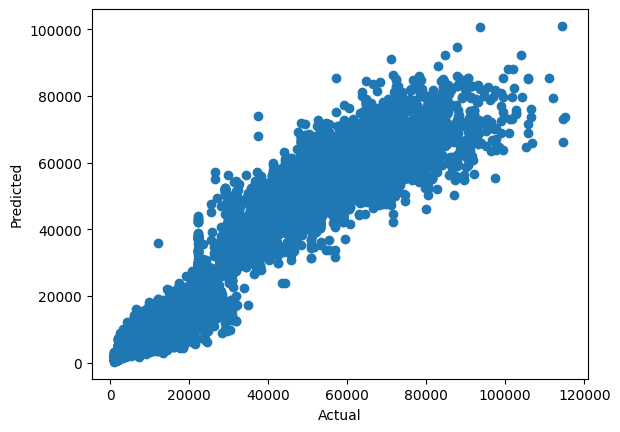

In [24]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

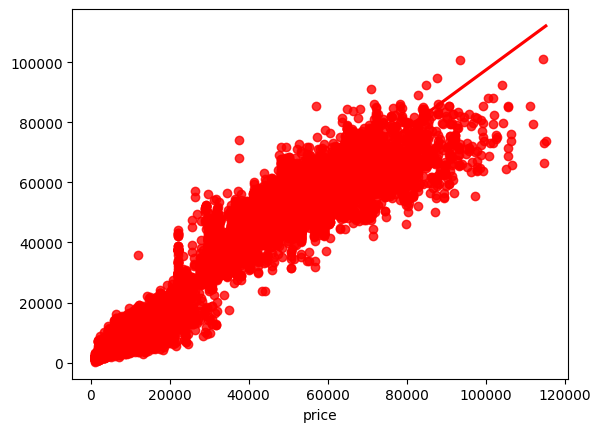

In [25]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [26]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
27131,7366,5716.910806,1649.089194
266857,64831,66282.944415,-1451.944415
141228,6195,6437.640625,-242.640625
288329,60160,57569.179663,2590.820337
97334,6578,6732.117989,-154.117989
...,...,...,...
5234,5026,6214.217508,-1188.217508
5591,3001,2593.486166,407.513834
168314,6734,6564.451131,169.548869
175191,5082,3493.491503,1588.508497
